In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.externals import joblib
#from sklearn import cross_validation
from sklearn import svm
from sklearn import neighbors
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [60]:
data=pd.read_csv('application_info.csv', index_col='id')
y = pd.read_csv('default_flg.csv', index_col='id')
train_index    = data[data.sample_cd =='train'].sample_cd.index
validate_index = data[data.sample_cd =='validate'].sample_cd.index
test_index     = data[data.sample_cd =='test'].sample_cd.index
data.drop(['sample_cd','application_dt'],axis=1,inplace=True) #Удаляем два столбца из выборки

In [61]:
#data['application_dt'] = pd.to_datetime(data['application_dt'], format='%d%b%Y')

пустое значение заменяем на "нет образования"

In [62]:
data.education_cd.fillna('no_ed', inplace=True)

In [63]:
num_columns  = [col for col in data.columns if data.dtypes[col] != 'object']
data_numerical = data[num_columns]
data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()
data.drop(num_columns, axis=1, inplace=True)
data = pd.concat([data, data_numerical], axis=1)

кодируем категориальныйе признаки

In [64]:
category_columns = [col for col in data.columns if data.dtypes[col] == 'object']
data_category = pd.get_dummies(data[category_columns], drop_first=True)
data.drop(category_columns, axis=1, inplace=True)
data = pd.concat([data, data_category], axis=1)


In [20]:
CorrKoef = data.corr()
max=0
for col in CorrKoef.columns:
    for row in CorrKoef.columns:
        if row!=col:
            if abs(CorrKoef[col][row]) > 0.7:
                print(col, row,CorrKoef[col][row])
                     

home_address_cd work_address_cd 0.74087395785
work_address_cd home_address_cd 0.74087395785
sample_cd_train sample_cd_validate -0.779528825393
sample_cd_validate sample_cd_train -0.779528825393
education_cd_GRD education_cd_SCH -0.713393701343
education_cd_SCH education_cd_GRD -0.713393701343
car_own_flg_Y car_type_flg_Y 0.700206477339
car_type_flg_Y car_own_flg_Y 0.700206477339


In [39]:
print ('%8s %8s %4s' % ('Train','Validate','C'))
for C in [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]: 
    LR=LogisticRegression(penalty='l2', C=C) 
    LR.fit(data.loc[train_index], y.loc[train_index].default_flg)
    AUC_train = roc_auc_score(y.loc[train_index].default_flg, LR.predict_proba(data.loc[train_index])[:,1])
    AUC_validate = roc_auc_score(y.loc[validate_index].default_flg, LR.predict_proba(data.loc[validate_index])[:,1])
    print('%.6f %.6f %f' %  (AUC_train, AUC_validate, C))

   Train Validate    C
0.574678 0.576420 0.000010
0.595031 0.601508 0.000100
0.596283 0.603663 0.001000
0.596316 0.603821 0.010000
0.596394 0.603805 0.100000
0.596399 0.603779 1.000000
0.596396 0.603779 10.000000
0.596396 0.603779 100.000000
0.596396 0.603779 1000.000000


In [60]:
from sklearn.decomposition import PCA

print ('%8s %8s %4s' % ('Train','Validate','C'))
for n in range (8,18): 
    print('**', n, '**')
    pca = PCA(n_components = n)
    XPCA =pd.DataFrame( pca.fit_transform(data))
    for C in [ 0.1, 1, 10, 100, 1000]: 
        LR=LogisticRegression(penalty='l2', C=C) 
        LR.fit(XPCA.loc[train_index], y.loc[train_index].default_flg)
        AUC_train = roc_auc_score(y.loc[train_index].default_flg, LR.predict_proba(XPCA.loc[train_index])[:,1])
        AUC_validate = roc_auc_score(y.loc[validate_index].default_flg, LR.predict_proba(XPCA.loc[validate_index])[:,1])
        print('%.6f %.6f %f' %  (AUC_train, AUC_validate, C))

   Train Validate    C
** 8 **
0.507281 0.503343 0.100000
0.506379 0.500382 1.000000
0.507290 0.503346 10.000000
0.507290 0.503346 100.000000
0.506384 0.500408 1000.000000
** 9 **
0.503177 0.499686 0.100000
0.503189 0.499689 1.000000
0.503189 0.499687 10.000000
0.503189 0.499687 100.000000
0.502685 0.500086 1000.000000
** 10 **
0.506903 0.504080 0.100000
0.505296 0.502609 1.000000
0.505323 0.503373 10.000000
0.505323 0.503373 100.000000
0.506909 0.504090 1000.000000
** 11 **
0.507044 0.503881 0.100000
0.507058 0.503881 1.000000
0.506167 0.502707 10.000000
0.507060 0.503881 100.000000
0.507060 0.503881 1000.000000
** 12 **
0.507512 0.503412 0.100000
0.500061 0.499317 1.000000
0.508170 0.504358 10.000000
0.507521 0.503414 100.000000
0.507523 0.503412 1000.000000
** 13 **
0.508520 0.504347 0.100000
0.508530 0.504337 1.000000
0.508531 0.504336 10.000000
0.508531 0.504336 100.000000
0.508531 0.504336 1000.000000
** 14 **
0.506892 0.505613 0.100000
0.506907 0.505608 1.000000
0.506908 0.50560

In [65]:
def WoE(target, feature, nbuck=10):
    """Функция, русующая зависимость WoE от среднего значения признака в бакете"""
    #Копируем данные
    df = pd.DataFrame()
    df['target']  = target.copy()
    df['feature'] = feature.copy()
    #Считаем номер бакета
    df['feature_buck'] = df['feature'].rank(method='min', pct=1, na_option = 'top').apply(
        lambda x: int((x- 1/df.shape[0])*nbuck))
    #Запоминаем среднее значение целевой переменной и кол-во наблюдений
    tr  = df['target'].mean()
    cnt = df['target'].count()
    #Агрегируем по каждому бакету
    df = df.groupby('feature_buck')['target' ].agg({'tr': 'mean','cnt': 'size'}).join(
        df.groupby('feature_buck')['feature'].agg({'feature_av': 'mean'}))
    #В случае крайних значений tr делаем сглаживание
    df.tr = df.tr.apply(lambda x: max(0.001, min(0.999, x)))
    
    #считаем WoE
    df.eval('WoE = log(tr/@tr)-log((1-tr)/(1-@tr))', inplace=True)
    #Погрешность WoE
    df.eval('WoE_d = 2/sqrt(tr*(1-tr)*cnt)', inplace=True) 
    #убираем наблюдения с пустым значением признака
    df.dropna(inplace=True)
    #Рисуем график
    fig = plt.gcf()
    plt.grid(True)
    plt.errorbar(df['feature_av'], df.WoE, yerr=np.array((df['WoE_d'])))
    plt.xlabel('feature')
    plt.ylabel('WoE')
    plt.show()

def IV(target, feature, nbuck=10):
    """Функция, возвращающая IV признака-feature с целевой переменной target"""
    #Копируем данные
    df = pd.DataFrame()
    df['target']  = target.copy()
    df['feature'] = feature.copy()
    #Считаем номер бакета
    df['feature_buck'] = df['feature'].rank(method='min', pct=1, na_option = 'top').apply(
        lambda x: int((x- 1.0/df.shape[0])*nbuck))
    #Запоминаем среднее значение целевой переменной и кол-во наблюдений
    tr  = df['target'].mean()
    cnt = df['target'].count()
    #Агрегируем по каждому бакету
    df = df.groupby('feature_buck')['target'].agg({'tr': 'mean','cnt': 'size'})
    #В случае крайних значений tr делаем сглаживание
    df.tr = df.tr.apply(lambda x: max(0.001, min(0.999, x)))
    #Считаем IV
    df.eval('IV = ( (tr/@tr) - ((1-tr)/(1-@tr))) * (log(tr/@tr) - log((1-tr)/(1-@tr)) ) * (cnt/@cnt)', inplace=True)
    IV = df.IV.sum()
    return IV

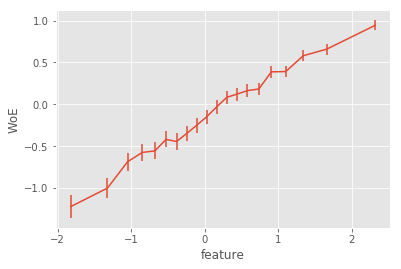

In [66]:
WoE(y.loc[train_index].default_flg, data.loc[train_index].Score_bki, nbuck=20)

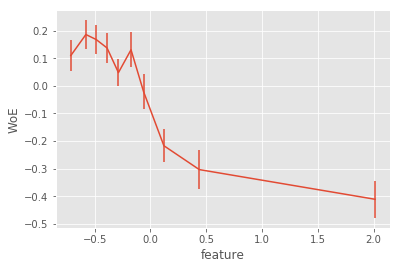

In [53]:
WoE(y.loc[train_index].default_flg, data.loc[train_index].income, nbuck=10)

In [55]:
print (IV(y.loc[train_index].default_flg, data.loc[train_index].income, nbuck=10))
print (IV(y.loc[train_index].default_flg, data.loc[train_index].income.apply(lambda x: np.log(x)), nbuck=10))
print (IV(y.loc[train_index].default_flg, data.loc[train_index].income.apply(lambda x: int(x > 0)), nbuck=10))

0.03837794897479724
0.034555024624488326
0.03275181593515397


In [58]:
data['income_0_flg'] = data.income.apply(lambda x: int(x > 0))
data.drop('income', axis=1, inplace=True)

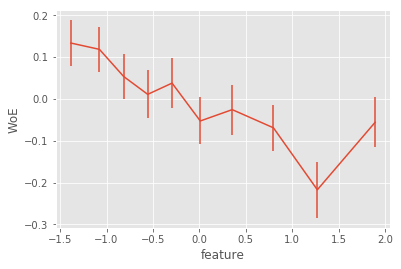

In [49]:
WoE(y.loc[train_index].default_flg, data.loc[train_index].age, nbuck=10)

In [67]:
print ('%8s %8s %4s' % ('Train','Validate','C'))
for C in [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]: 
    LR=LogisticRegression(penalty='l2', C=C) 
    LR.fit(data.loc[train_index], y.loc[train_index].default_flg)
    AUC_train = roc_auc_score(y.loc[train_index].default_flg, LR.predict_proba(data.loc[train_index])[:,1])
    AUC_validate = roc_auc_score(y.loc[validate_index].default_flg, LR.predict_proba(data.loc[validate_index])[:,1])
    print('%.6f %.6f %f' %  (AUC_train, AUC_validate, C))

   Train Validate    C
0.636948 0.612759 0.000010
0.687739 0.667362 0.000100
0.724056 0.708655 0.001000
0.728665 0.715054 0.010000
0.728975 0.715896 0.100000
0.729046 0.716087 1.000000
0.729044 0.716116 10.000000
0.729042 0.716118 100.000000
0.729042 0.716118 1000.000000


In [68]:
LR_best = LogisticRegression(C=100, penalty='l2') # <- на самом деле ругуляризация 1/C
LR.fit(data.loc[train_index], y.loc[train_index].default_flg)
test_pd = LR.predict_proba(data.loc[test_index])[:,1]

In [69]:
test_pd = pd.DataFrame(test_pd, columns=['score'], index=test_index)
test_pd.to_csv('my_submission.csv')
print(test_pd.shape)
test_pd.head(2)

(24480, 1)


,score
id,
180817,0.074953
180818,0.120073
